# Krylov Subspace Methods for Extremal Eigenvalue Problems

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

Let us make a matrix with a defined set of eigenvalues and eigenvectors, given by `eigvals` and `eigvecs`.

In [2]:
np.random.seed(40)

# Generate matrix with eigenvalues 1...50
n = 50
eigvals = np.geomspace(1., n, n)
eigvecs = np.random.randn(n, n)
#To work with symmetric matrix, orthogonalize eigvecs
eigvecs, R = la.qr(eigvecs)

print(eigvals)
max_eigval = eigvals[np.argmax(np.abs(eigvals))]
min_eigval = eigvals[np.argmin(np.abs(eigvals))]

A = la.solve(eigvecs, np.dot(np.diag(eigvals), eigvecs))

[ 1.          1.08311073  1.17312885  1.27062844  1.37623129  1.49061088
  1.61449663  1.74867862  1.89401257  2.05142534  2.22192079  2.40658624
  2.60659937  2.82323575  3.05787692  3.3120193   3.58728363  3.88542538
  4.20834591  4.5581046   4.93693199  5.347244    5.79165734  6.27300619
  6.7943603   7.35904453  7.97066007  8.63310743  9.35061127 10.12774737
 10.96947182 11.88115261 12.86860384 13.93812287 15.0965304  16.35121402
 17.71017531 19.18208087 20.77631756 22.50305243 24.37329749 26.39897997
 28.5930184  30.96940496 33.54329473 36.33110236 39.3506067  42.62106425
 46.1633319  50.        ]


## Initialization

Set up $Q$ and $H$:

In [3]:
Q = np.zeros((n, n))
H = np.zeros((n, n))

k = 0

Pick a starting vector, normalize it

In [4]:
x0 = np.random.randn(n)
x0 = x0/la.norm(x0)

# Poke it into the first column of Q
Q[:, k] = x0.copy()

Make a list to save arrays of Ritz values:

In [5]:
ritz_values = []
ritz_max = []
ritz_min = []

## Algorithm

Carry out one iteration of Arnoldi iteration.

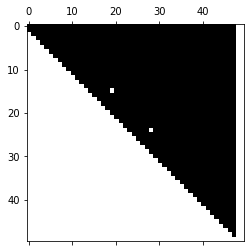

In [6]:

k = n-1

for kk in range(k-1):
    
    u = A @ Q[:, kk]
    
    # Carry out Gram-Schmidt on u against Q
    # to do Lanczos change range start to k-1
    # u = (np.eye(n,n) - Q[:,:kk+1] @ Q[:,:kk+1].T) @ u
    for j in range(0,kk+1):
        qj = Q[:, j]
        H[j,kk] = qj @ u
        u = u - H[j,kk]*qj
    
    if kk+1 < n:
        H[kk+1, kk] = la.norm(u)
        Q[:, kk+1] = u/H[kk+1, kk]
    
    if kk>1:
        D = la.eig(H[:kk,:kk])[0]
        max_ritz = D[np.argmax(np.abs(D))]
        min_ritz = D[np.argmin(np.abs(D))]
        ritz_vals = np.zeros(kk)
        for i in range(kk):
            ritz_vals[i] = D[np.argmax(np.abs(D))]
            D[np.argmax(np.abs(D))] = 0
        ritz_max.append(max_ritz)
        ritz_min.append(min_ritz)
        ritz_values.append(ritz_vals)
    
pt.spy(H)

Check that $Q^T A Q =H$:

In [7]:
la.norm(Q[:,:k-1].T @ A @ Q[:,:k-1] - H[:k-1,:k-1])/ la.norm(A)

2.9534831694945666e-05

Check that $AQ-QH$ is fairly small

In [8]:
la.norm(A @ Q[:,:k-1] - Q[:,:k-1]@H[:k-1,:k-1])/ la.norm(A)

0.002840335886635055

Check that Q is orthogonal:

In [9]:
la.norm((Q.T.conj() @ Q)[:k-1,:k-1] - np.eye(k-1))

0.0002218566138916599

## Compare Max Ritz Value to Power Iteration

49.999450352135746 49.99999999999996


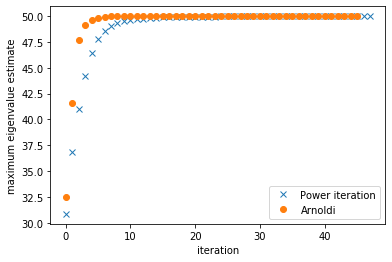

In [10]:
#true largest eigenvalue is 50
r = 0
x = A @ x0.copy()
x = x / la.norm(x)
mrs = []
for i in range(k-1):
    y = A @ x
    r = x @ y
    x = y / la.norm(y)
    mrs.append(r)
print(r,max_ritz)
pt.plot(mrs, "x", label="Power iteration")
pt.plot(ritz_max, "o", label="Arnoldi")
pt.xlabel("iteration")
pt.ylabel("maximum eigenvalue estimate")
pt.legend()

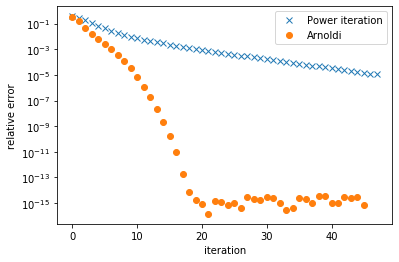

In [11]:
pt.plot(np.abs(max_eigval-mrs)/max_eigval, "x", label="Power iteration")
pt.plot(np.abs(max_eigval-ritz_max)/max_eigval, "o", label="Arnoldi")
pt.xlabel("iteration")
pt.ylabel("relative error")
pt.yscale("log")
pt.legend()

## Plot convergence of Ritz values

Enable the Ritz value collection above to make this work.

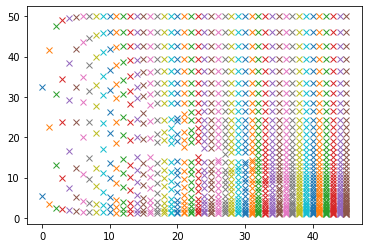

In [12]:
for i, rv in enumerate(ritz_values):
    pt.plot([i] * len(rv), rv, "x")

## Compare Min Ritz Value to Inverse Iteration

1.0003685424335513 1.000008943945855


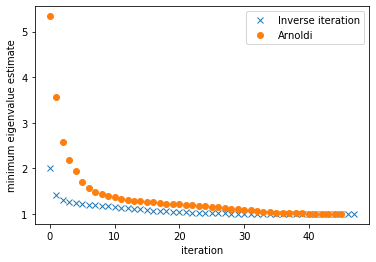

In [13]:
#true largest eigenvalue is 50
r = 0
x = la.solve(A, x0.copy())
x = x / la.norm(x)
rs = []
for i in range(k-1):
    y = A @ x
    r = x @ y
    y = la.solve(A,x)
    x = y / la.norm(y)
    rs.append(r)
print(r,min_ritz)
pt.plot(rs, "x", label="Inverse iteration")
pt.plot(ritz_min, "o", label="Arnoldi")
pt.xlabel("iteration")
pt.ylabel("minimum eigenvalue estimate")
pt.legend()

[-1.01460476e+00 -4.15580912e-01 -3.08213240e-01 -2.64621676e-01
 -2.38672106e-01 -2.19734244e-01 -2.04138597e-01 -1.90200460e-01
 -1.77016594e-01 -1.64074730e-01 -1.51099190e-01 -1.37983538e-01
 -1.24756624e-01 -1.11556394e-01 -9.85986181e-02 -8.61373106e-02
 -7.44214326e-02 -6.36567361e-02 -5.39808530e-02 -4.54551024e-02
 -3.80710305e-02 -3.17661972e-02 -2.64431222e-02 -2.19867884e-02
 -1.82782779e-02 -1.52039598e-02 -1.26607555e-02 -1.05584546e-02
 -8.82007213e-03 -7.38105900e-03 -6.18794555e-03 -5.19679224e-03
 -4.37166615e-03 -3.68325499e-03 -3.10766387e-03 -2.62540168e-03
 -2.22054401e-03 -1.88005095e-03 -1.59321570e-03 -1.35122118e-03
 -1.14678438e-03 -9.73871136e-04 -8.27467270e-04 -7.03394527e-04
 -5.98162133e-04 -5.08846681e-04 -4.32994565e-04 -3.68542434e-04]


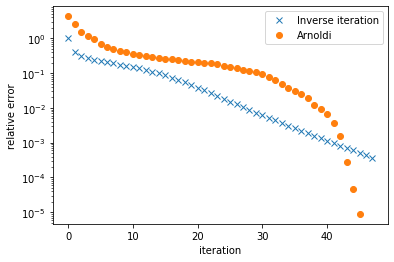

In [14]:
print(min_eigval-rs)
pt.plot(np.abs(min_eigval-rs)/min_eigval, "x", label="Inverse iteration")
pt.plot(np.abs(min_eigval-ritz_min)/min_eigval, "o", label="Arnoldi")
pt.xlabel("iteration")
pt.ylabel("relative error")
pt.yscale("log")
pt.legend()